In [1]:
## Importing the Libraries
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPool2D
## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

2.0.0-alpha0


In [2]:
#Function to load the images and preprocess them
def load_image(img_path, show=False):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128,128))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    #img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)                                 # imshow expects values in the range [0, 1]

    return img_tensor

In [3]:
#Get each image, preprocess it using the above function and store it again for the further process
x = []
y = []

def get_image(path):
    data =[]
    for subdir, dirs, files in os.walk(path):
        for f in files:
            path = os.path.join(subdir, f)
            img = load_image(path)     
            print(img.shape)
            data.append(img)
    return data


x = get_image(r'C:\Users\hp\WowExp\segmentation\ae_data\y')
y = get_image(r'C:\Users\hp\WowExp\segmentation\ae_data\y')

x = np.asarray(x)
y = np.asarray(y)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [4]:
#check similarity of Shape of the data
print(x.shape)
print(y.shape)

(22, 128, 128, 3)
(22, 128, 128, 3)


In [5]:
#Going to create a Sequential model which takes the image, downsample it and then upsample it.
model = Sequential()
#Image Dimesions = 128*128*3
model.add(Conv2D(16, (3, 3), activation='relu', padding = 'same', input_shape=(128, 128, 3)))
model.add(Conv2D(16, (5, 5), activation='relu', padding = 'same', strides = 1))
model.add(MaxPool2D(2, 2))

#Image Dimesions = 64*64*16
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', strides = 1))
model.add(Conv2D(32, (5, 5), activation='relu', padding = 'same', strides = 1))
model.add(MaxPool2D(2, 2))

#Image Dimesions = 32*32*32
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same', strides = 1))
model.add(Conv2D(64, (5, 5), activation='relu', padding = 'same', strides = 1))
model.add(MaxPool2D(2, 2))

#Image Dimesions = 16*16*64
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', strides = 1))
model.add(Conv2D(128, (5, 5), activation='relu', padding = 'same', strides = 1))
model.add(MaxPool2D(2, 2))
#Image Dimesions = 8*8*128
X = model.output
#Image Dimesions = 8*8*128
model.add(UpSampling2D(size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same', strides = 1))
model.add(Conv2D(64, (5, 5), activation='relu', padding = 'same', strides = 1))

#Image Dimesions = 16*16*64
model.add(UpSampling2D(size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', strides = 1))
model.add(Conv2D(32, (5, 5), activation='relu', padding = 'same', strides = 1))

#Image Dimesions = 32*32*32
model.add(UpSampling2D(size = (2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding = 'same', strides = 1))
model.add(Conv2D(16, (5, 5), activation='relu', padding = 'same', strides = 1))

#Image Dimesions = 64*64*16
model.add(UpSampling2D(size = (2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding = 'same', strides = 1))
model.add(Conv2D(16, (5, 5), activation='relu', padding = 'same', strides = 1))

#Image Dimesions = 128*128*16
model.add(Conv2D(3, (1, 1), padding="same", activation="sigmoid"))

In [6]:
#Using Adam Optimizer and Categorical crossentropy as a loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      6416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1

In [11]:
batch_size = 64
#augmenting the data by rotating it
aug = ImageDataGenerator(rotation_range=20)

model.fit_generator(aug.flow(x, y, batch_size=batch_size),epochs=15)

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 395.8554 - acc: 0.5691
Epoch 2/15
1/1 [==============================] - 3s 3s/step - loss: 395.8332 - acc: 0.5692
Epoch 3/15
1/1 [==============================] - 3s 3s/step - loss: 396.0471 - acc: 0.5697
Epoch 4/15
1/1 [==============================] - 3s 3s/step - loss: 395.7023 - acc: 0.5697
Epoch 5/15
1/1 [==============================] - 3s 3s/step - loss: 396.5320 - acc: 0.5696
Epoch 6/15
1/1 [==============================] - 3s 3s/step - loss: 395.9090 - acc: 0.5697
Epoch 7/15
1/1 [==============================] - 3s 3s/step - loss: 396.4750 - acc: 0.5697
Epoch 8/15
1/1 [==============================] - 3s 3s/step - loss: 396.3820 - acc: 0.5697
Epoch 9/15
1/1 [==============================] - 3s 3s/step - loss: 395.7717 - acc: 0.5697
Epoch 10/15
1/1 [==============================] - 3s 3s/step - loss: 395.6906 - acc: 0.5697
Epoch 11/15
1/1 [==============================] - 3s 3s/step - loss: 396.0978 

In [9]:
x  = X.numpy()

AttributeError: 'Tensor' object has no attribute 'numpy'

In [49]:
#Plot function to plot the images
def plot(img):   
    plt.imshow(img)                           
    plt.axis('off')
    plt.show()

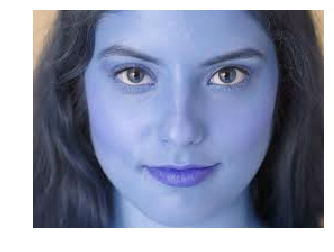

In [50]:
#read the image and plot it to compare it with the predicted image
p = r'C:\Users\hp\WowExp\segmentation\ae_data\y\1.jpg'
img= cv2.imread(p)
plot(img)

In [51]:
#Load the image and predict output using model
img = load_image(p)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
result = np.resize(result, (128,128,3))

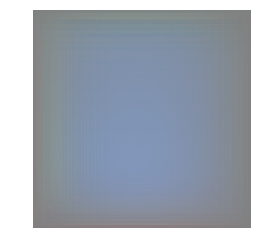

In [52]:
#Load the image and predict output using model
plot(result)